In [1]:
!pip install -r requirements.txt
!sudo ./install_requirements

Hit:1 https://deb.nodesource.com/node_16.x focal InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease                         
Hit:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease           
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2198 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3069 kB]
Fetched 5604 kB in 1s (3949 kB/s)                         
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (4.0.1-5build1).
0 upgraded, 0 newly installed, 0 to remove and 140 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information

In [2]:
%load_ext autoreload
%autoreload 2

import gymnasium as gym
from pyvirtualdisplay import Display
from tools.remote_display import *
import numpy as np
from learning_algorithm.q_learning import *

In [3]:
# Discretization bins for each state component
state_bins = [
    np.linspace(-4.8, 4.8, 20),
    np.linspace(-0.5, 0.5, 20),
    np.linspace(-0.42, 0.42, 20),
    np.linspace(-0.5, 0.5, 20)
]

# Initialize Q-table
n_actions = env.action_space.n
q_table = np.zeros((len(state_bins[0]) + 1, len(state_bins[1]) + 1, len(state_bins[2]) + 1, len(state_bins[3]) + 1, n_actions))

# Train Q-learning agent
for episode in range(n_episodes):
    state = discretize_state(env.reset()[0], state_bins)
    done = False
    
    while not done:
        action = choose_action(state, q_table, epsilon, n_actions)
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state, state_bins)
        
        update_q_table(q_table, state, action, reward, next_state, alpha, gamma)
        state = next_state

    # Decay exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Test Q-learning agent
n_test_episodes = 10
for episode in range(n_test_episodes):
    state = discretize_state(env.reset(), state_bins)
    done = False
    total_reward = 0

    while not done:
        action = choose_action(state, q_table, 0, n_actions)
        state, reward, done, _ = env.step(action)
        state = discretize_state(state, state_bins)
        total_reward += reward

    print(f"Episode {episode + 1}: {total_reward}")

env.close()


NameError: name 'env' is not defined

In [4]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
observation, info = env.reset()

In [29]:
# Discretization bins for each state component
state_bins = np.array([
    np.linspace(-4.8, 4.8, 20),
    np.linspace(-0.5, 0.5, 20),
    np.linspace(-0.42, 0.42, 20),
    np.linspace(-0.5, 0.5, 20)
])

q_model = QLearning(state_bins=state_bins, n_actions=2)

In [30]:
q_model.q_table.shape

(21, 21, 21, 21, 2)

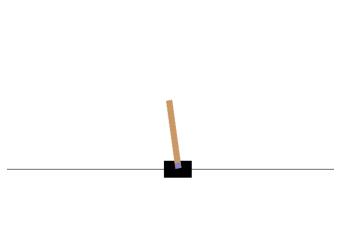

In [ ]:
# Q-learning parameters
n_episodes = 5
alpha = 0.1      # Learning rate
gamma = 0.99     # Discount factor
epsilon = 1.0    # Exploration rate
epsilon_min = 0.01
epsilon_decay = 0.999
max_steps = 100

q_model.train(env, n_episodes, max_steps, alpha, gamma, epsilon, epsilon_min, epsilon_decay, real_time_video=True, keep_frames=True)

In [ ]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
observation, info = env.reset()

for _ in range(1000):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    frame = env.render()

    if terminated or truncated:
        observation, info = env.reset()
        break

env.close()
ipythondisplay.clear_output(wait=True)